In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
train = pd.read_hdf('train.h5')

In [3]:
excl = ['id', 'y', 'timestamp']
cols_feature = [c for c in train.columns if c not in excl]

In [4]:
ids = train['id'].unique()

In [5]:
ids.shape[0]

1424

In [6]:
set_1 = [0, 11, 27, 32, 33, 40, 41, 49, 58, 72, 85, 93, 95, 99, 101, 111, 119, 122, 137, 140, 158, 170, 171, 172, 173, 216, 226, 241, 245, 255, 262, 266, 271, 277, 280, 303, 308, 316, 329, 339, 340, 353, 357, 369, 408, 411, 412, 429, 435, 437, 473, 490, 502, 505, 508, 513, 527, 529, 531, 533, 546, 569, 575, 589, 609, 624, 625, 653, 682, 703, 706, 723, 729, 752, 761, 767, 769, 793, 804, 807, 820, 824, 838, 852, 861, 869, 870, 882, 884, 909, 940, 953, 958, 980, 986, 1000, 1002, 1004, 1009, 1022, 1023, 1024, 1035, 1056, 1060, 1065, 1088, 1098, 1105, 1107, 1113, 1118, 1128, 1146, 1151, 1157, 1165, 1184, 1200, 1210, 1213, 1229, 1243, 1257, 1265, 1276, 1277, 1281, 1291, 1294, 1310, 1311, 1317, 1325, 1326, 1343, 1354, 1373, 1383, 1394, 1429, 1431, 1432, 1434, 1447, 1501, 1506, 1515, 1538, 1543, 1552, 1573, 1606, 1610, 1616, 1639, 1657, 1659, 1673, 1681, 1692, 1696, 1697, 1711, 1714, 1717, 1726, 1732, 1737, 1745, 1772, 1780, 1788, 1798, 1817, 1825, 1828, 1840, 1852, 1893, 1895, 1897, 1916, 1939, 1950, 1956, 1962, 1986, 2006, 2043, 2063, 2071, 2076, 2086, 2089, 2090, 2093, 2117, 2154]
set_2 = [13, 14, 15, 31, 46, 48, 54, 55, 56, 65, 82, 90, 97, 103, 113, 127, 131, 141, 150, 151, 154, 163, 169, 178, 186, 188, 203, 206, 218, 220, 222, 227, 232, 258, 264, 269, 285, 288, 289, 296, 306, 317, 319, 324, 325, 334, 338, 355, 361, 363, 377, 382, 386, 388, 399, 406, 407, 423, 431, 445, 456, 458, 467, 468, 469, 482, 483, 484, 492, 501, 506, 509, 517, 528, 532, 551, 565, 568, 573, 577, 579, 584, 585, 586, 587, 592, 601, 620, 638, 644, 649, 650, 651, 667, 693, 708, 713, 720, 736, 737, 740, 748, 762, 763, 765, 773, 785, 788, 792, 797, 798, 800, 809, 811, 817, 828, 842, 856, 863, 865, 866, 875, 881, 890, 891, 897, 906, 912, 914, 960, 961, 963, 967, 994, 1012, 1013, 1018, 1030, 1033, 1045, 1046, 1050, 1064, 1070, 1076, 1090, 1120, 1126, 1135, 1139, 1144, 1153, 1166, 1174, 1175, 1195, 1197, 1209, 1215, 1227, 1228, 1230, 1238, 1244, 1246, 1249, 1255, 1260, 1261, 1263, 1272, 1285, 1295, 1296, 1297, 1304, 1306, 1313, 1318, 1323, 1331, 1332, 1357, 1365, 1374, 1376, 1377, 1387, 1398, 1401, 1402, 1416, 1422, 1427, 1441, 1442, 1459, 1465, 1479, 1493, 1495, 1502, 1511, 1537, 1539, 1548, 1554, 1569, 1575, 1577, 1579, 1583, 1585, 1591, 1602, 1614, 1624, 1625, 1637, 1646, 1652, 1664, 1667, 1685, 1686, 1690, 1695, 1699, 1705, 1730, 1731, 1739, 1793, 1794, 1802, 1803, 1810, 1830, 1831, 1845, 1853, 1858, 1862, 1863, 1866, 1888, 1896, 1899, 1904, 1911, 1918, 1926, 1927, 1931, 1941, 1945, 1951, 1963, 1965, 1968, 1972, 2004, 2013, 2015, 2018, 2024, 2029, 2036, 2037, 2044, 2055, 2056, 2057, 2064, 2065, 2069, 2075, 2097, 2102, 2107, 2108, 2112, 2118, 2121, 2124, 2129, 2136, 2140, 2150, 2151, 2155, 2156, 2158]
set_3 = [6, 17, 20, 23, 24, 25, 30, 43, 47, 59, 60, 62, 63, 66, 68, 77, 79, 80, 88, 100, 102, 104, 105, 108, 115, 118, 129, 132, 134, 149, 156, 159, 166, 174, 175, 176, 179, 181, 183, 187, 195, 198, 205, 212, 215, 217, 223, 225, 229, 231, 233, 240, 242, 244, 248, 249, 252, 253, 256, 257, 259, 268, 270, 273, 274, 275, 290, 297, 300, 304, 305, 310, 312, 318, 333, 341, 343, 344, 346, 352, 356, 364, 372, 374, 378, 379, 381, 383, 384, 389, 391, 392, 395, 396, 398, 400, 402, 403, 404, 410, 413, 414, 416, 418, 419, 425, 430, 432, 433, 440, 446, 448, 449, 450, 459, 461, 470, 474, 480, 481, 491, 494, 520, 521, 523, 535, 536, 538, 539, 540, 543, 550, 553, 554, 555, 556, 561, 570, 572, 578, 582, 594, 595, 597, 600, 602, 604, 606, 608, 610, 613, 614, 621, 622, 629, 631, 636, 637, 641, 642, 648, 652, 654, 659, 662, 670, 676, 683, 687, 689, 690, 691, 692, 695, 696, 697, 698, 699, 700, 701, 715, 722, 724, 726, 727, 731, 741, 745, 751, 757, 760, 766, 770, 776, 777, 783, 786, 791, 794, 799, 802, 808, 810, 812, 815, 816, 819, 821, 823, 829, 831, 832, 833, 839, 841, 843, 844, 846, 848, 849, 855, 858, 859, 867, 868, 871, 872, 873, 874, 889, 898, 907, 910, 915, 918, 924, 925, 926, 929, 932, 936, 937, 938, 942, 943, 944, 946, 949, 952, 954, 955, 959, 966, 968, 970, 973, 978, 979, 982, 983, 984, 988, 989, 991, 995, 999, 1007, 1008, 1010, 1011, 1015, 1016, 1017, 1019, 1021, 1025, 1034, 1036, 1037, 1038, 1039, 1041, 1042, 1048, 1049, 1053, 1062, 1063, 1066, 1071, 1072, 1073, 1085, 1086, 1087, 1089, 1093, 1095, 1108, 1112, 1114, 1116, 1125, 1130, 1133, 1134, 1136, 1137, 1152, 1164, 1168, 1169, 1170, 1172, 1177, 1178, 1181, 1182, 1186, 1187, 1194, 1204, 1205, 1208, 1212, 1218, 1221, 1223, 1224, 1226, 1231, 1232, 1235, 1236, 1239, 1240, 1241, 1247, 1256, 1259, 1264, 1266, 1271, 1274, 1279, 1288, 1290, 1292, 1303, 1307, 1312, 1316, 1319, 1324, 1327, 1335, 1336, 1339, 1342, 1348, 1349, 1350, 1359, 1363, 1371, 1375, 1378, 1379, 1380, 1381, 1382, 1388, 1390, 1391, 1392, 1396, 1406, 1409, 1414, 1419, 1438, 1439, 1440, 1443, 1445, 1450, 1451, 1452, 1454, 1457, 1460, 1462, 1464, 1466, 1467, 1473, 1477, 1478, 1483, 1486, 1489, 1491, 1492, 1497, 1505, 1507, 1509, 1514, 1517, 1519, 1521, 1524, 1530, 1534, 1535, 1541, 1545, 1546, 1553, 1555, 1561, 1564, 1566, 1568, 1570, 1578, 1587, 1588, 1589, 1599, 1603, 1604, 1607, 1619, 1627, 1628, 1629, 1636, 1650, 1653, 1654, 1660, 1662, 1663, 1666, 1669, 1671, 1688, 1703, 1704, 1708, 1728, 1733, 1734, 1744, 1747, 1749, 1750, 1759, 1760, 1767, 1774, 1775, 1776, 1785, 1787, 1789, 1791, 1792, 1795, 1799, 1808, 1813, 1818, 1821, 1822, 1833, 1836, 1838, 1843, 1854, 1857, 1859, 1861, 1864, 1867, 1872, 1873, 1876, 1882, 1885, 1890, 1892, 1906, 1910, 1915, 1919, 1923, 1925, 1929, 1933, 1936, 1943, 1949, 1952, 1954, 1957, 1966, 1967, 1971, 1976, 1980, 1981, 1985, 1990, 1991, 1998, 2000, 2001, 2002, 2009, 2011, 2021, 2027, 2028, 2030, 2031, 2035, 2045, 2050, 2054, 2058, 2059, 2068, 2070, 2077, 2080, 2081, 2082, 2088, 2095, 2096, 2098, 2100, 2101, 2109, 2111, 2115, 2120, 2125, 2130, 2134, 2135, 2137, 2139, 2146]
set_4 = [7, 12, 19, 26, 38, 39, 44, 52, 69, 76, 81, 83, 91, 98, 106, 112, 126, 128, 130, 133, 142, 152, 161, 177, 185, 191, 208, 219, 224, 239, 278, 284, 330, 358, 366, 393, 417, 441, 451, 479, 500, 515, 530, 545, 548, 559, 567, 571, 583, 591, 615, 618, 639, 640, 656, 672, 694, 707, 709, 743, 753, 789, 795, 805, 806, 830, 845, 853, 864, 880, 885, 895, 935, 964, 975, 976, 992, 1003, 1043, 1057, 1059, 1100, 1101, 1131, 1138, 1150, 1155, 1159, 1161, 1176, 1192, 1199, 1201, 1207, 1225, 1258, 1269, 1270, 1287, 1301, 1322, 1329, 1340, 1346, 1352, 1370, 1385, 1404, 1408, 1410, 1415, 1421, 1424, 1426, 1436, 1444, 1476, 1481, 1482, 1494, 1498, 1499, 1513, 1516, 1522, 1532, 1536, 1560, 1562, 1565, 1612, 1613, 1615, 1638, 1647, 1655, 1668, 1672, 1676, 1677, 1679, 1680, 1701, 1706, 1716, 1718, 1727, 1729, 1738, 1743, 1753, 1756, 1764, 1766, 1769, 1783, 1784, 1796, 1806, 1812, 1814, 1827, 1839, 1842, 1860, 1865, 1870, 1883, 1884, 1887, 1902, 1903, 1907, 1928, 1935, 1973, 1975, 1977, 1979, 1992, 2023, 2033, 2062, 2092, 2126, 2131, 2142, 2148]
set_5 = [10, 16, 18, 22, 64, 70, 87, 121, 124, 160, 184, 199, 214, 221, 235, 261, 265, 279, 281, 286, 287, 294, 295, 298, 302, 307, 321, 347, 348, 349, 351, 362, 365, 380, 397, 424, 438, 439, 452, 453, 454, 462, 472, 507, 510, 512, 542, 557, 558, 576, 580, 588, 593, 599, 605, 611, 617, 619, 633, 646, 657, 663, 669, 677, 679, 684, 686, 704, 705, 711, 719, 728, 758, 780, 796, 860, 888, 892, 896, 901, 911, 913, 916, 920, 934, 941, 972, 977, 985, 990, 993, 1026, 1047, 1067, 1069, 1075, 1078, 1083, 1094, 1103, 1124, 1129, 1140, 1142, 1143, 1149, 1193, 1196, 1220, 1253, 1267, 1286, 1298, 1308, 1314, 1320, 1328, 1334, 1367, 1386, 1393, 1395, 1407, 1412, 1413, 1448, 1474, 1485, 1500, 1508, 1518, 1523, 1527, 1550, 1593, 1598, 1611, 1618, 1620, 1630, 1635, 1683, 1687, 1712, 1724, 1725, 1741, 1742, 1752, 1755, 1758, 1778, 1782, 1790, 1809, 1815, 1832, 1848, 1849, 1851, 1869, 1874, 1877, 1878, 1891, 1898, 1901, 1905, 1912, 1921, 1969, 1970, 1987, 2008, 2047, 2061, 2066, 2074, 2078, 2079, 2083, 2087, 2104, 2114, 2138, 2145, 2149, 2152]

In [13]:
def add_label(id):
    if id in set_1:
        return 'a'
    elif id in set_2:
        return 'b'
    elif id in set_3:
        return 'c'
    elif id in set_4:
        return 'd'
    elif id in set_5:
        return 'e'
    else:
        return 'n'
    

In [16]:
train['label'] = train.id.map(add_label)
label_dummy = pd.get_dummies(train.label)
train.drop('label', axis=1, inplace=True)

In [19]:
pd.concat([train, label_dummy], axis=1)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_42,technical_43,technical_44,y,label_1,a,b,c,d,e
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,NaN,-2.000000e+00,NaN,-0.011753,0,0.0,0.0,0.0,0.0,1.0
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,NaN,-2.000000e+00,NaN,-0.001240,1,1.0,0.0,0.0,0.0,0.0
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,NaN,-2.000000e+00,NaN,-0.020940,0,0.0,0.0,0.0,1.0,0.0
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,NaN,-2.000000e+00,NaN,-0.015959,0,0.0,0.0,1.0,0.0,0.0
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,NaN,0.000000e+00,NaN,-0.007338,0,0.0,0.0,0.0,1.0,0.0
5,27,0,0.346856,0.166239,-6.080701,-0.992249,-0.125916,0.345812,NaN,-0.584239,...,NaN,-2.000000e+00,NaN,0.031425,1,1.0,0.0,0.0,0.0,0.0
6,31,0,0.072036,0.014931,NaN,0.014063,NaN,-0.193205,NaN,NaN,...,NaN,-2.000000e+00,NaN,-0.032895,0,0.0,1.0,0.0,0.0,0.0
7,38,0,0.300062,0.071251,-0.074451,-0.065292,-0.011286,0.026365,0.210249,0.167494,...,NaN,-2.000000e+00,NaN,0.015803,0,0.0,0.0,0.0,1.0,0.0
8,39,0,-0.003511,-0.034270,0.082372,-0.023937,-0.025750,0.007815,0.263451,-0.241212,...,NaN,-2.000000e+00,NaN,-0.027593,0,0.0,0.0,0.0,1.0,0.0
9,40,0,-0.083330,0.081935,-2.048438,-0.206856,-0.839563,-0.234100,-0.291853,-5.722336,...,NaN,-2.000000e+00,NaN,0.006662,1,1.0,0.0,0.0,0.0,0.0


In [20]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y,label_1
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753,0
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240,1
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940,0
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959,0
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338,0


In [12]:
11 in set_1

True

In [15]:
train[['id', 'label']]

,id,label
0,10,e
1,11,a
2,12,d
3,25,c
4,26,d
5,27,a
6,31,b
7,38,d
8,39,d
9,40,a


In [7]:
len(set_1 + set_2 + set_3 + set_4 + set_5)

1424

In [38]:
nan_df = np.zeros((ids.shape[0], len(cols_feature)))
for i, id in enumerate(ids):
    for j, col in enumerate(cols_feature):
        feature = train.loc[train.id==id, col]
        nan_ratio[i, j] = feature.isnull().sum()


In [39]:
nan_ratio.shape

(1424, 108)

In [40]:
nan_ratio.max()

1813.0

In [41]:
nan_ratio.mean()

151.43699282147315

In [42]:
nan_sum = nan_ratio.sum(axis=0)

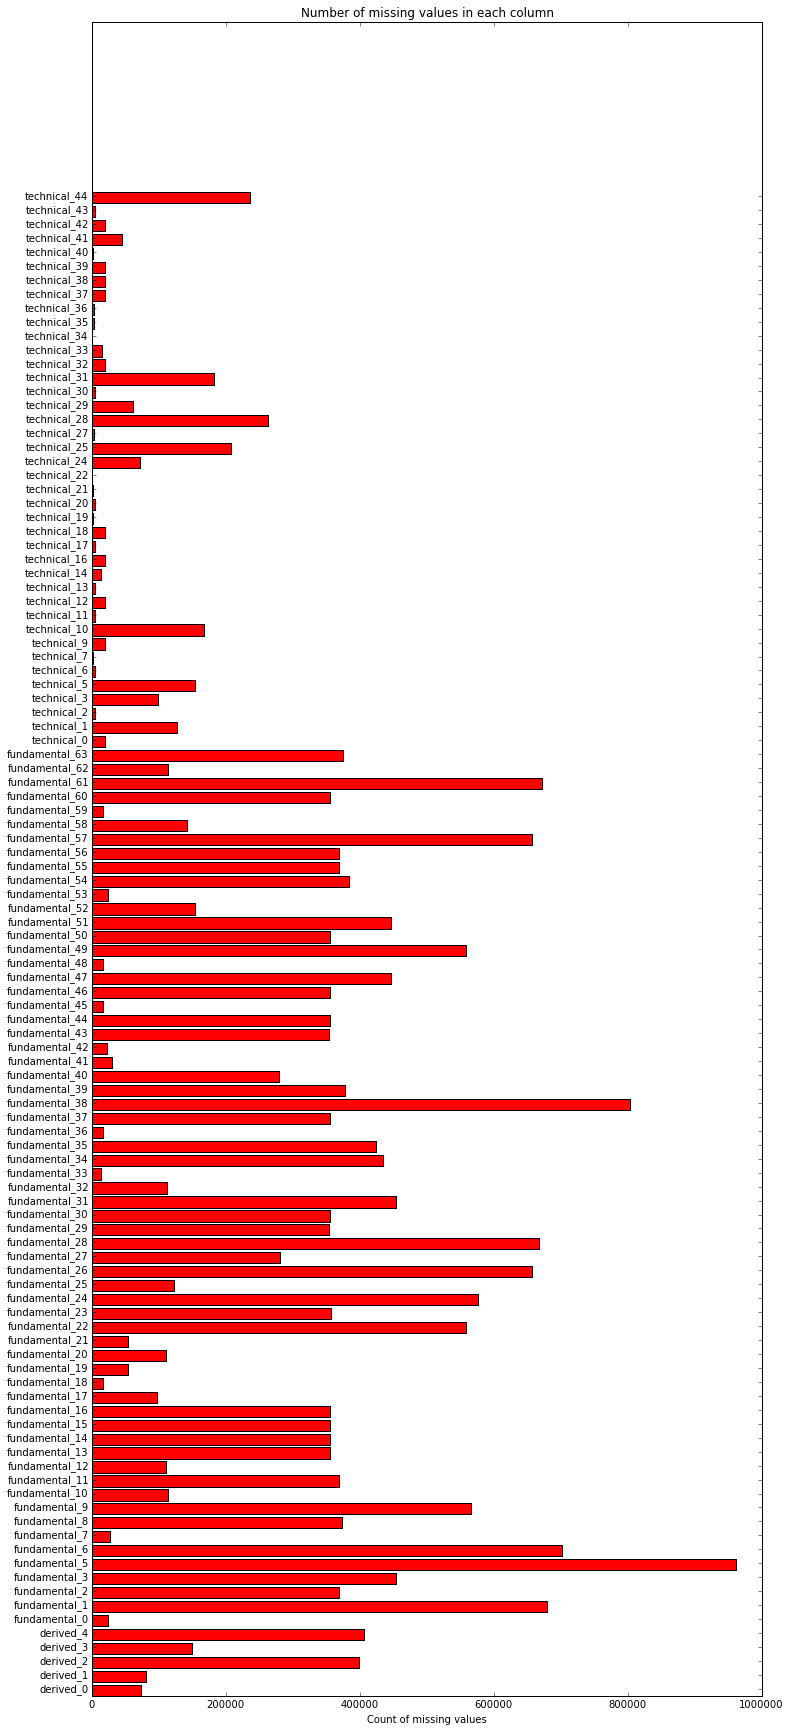

In [43]:
import matplotlib.pyplot as plt
ind = np.arange(len(cols_feature))
width = 1.0
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, nan_sum, color='r')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(cols_feature, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()